# Vamos importar as bibliotecas necessárias

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Fazer o dowload e préprocessamento dos dados

In [4]:
dados = pd.read_csv("/content/creditcard.csv")
dados = dados.dropna() # retira os valores Nan
dados

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,14834,1.180311,-0.268826,1.373170,-0.623739,-1.237326,-0.495057,-0.909022,-0.000706,2.961146,...,0.170907,0.974244,-0.036893,0.383235,0.369188,-0.581899,0.098968,0.035401,2.00,0.0
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,...,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,...,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,...,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0


In [56]:
# Separação das features e labels
x=dados.iloc[:, :-1]
y=dados.iloc[:, 30]

y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9959    0.0
9960    0.0
9961    0.0
9962    0.0
9963    0.0
Name: Class, Length: 9964, dtype: float64

In [57]:
# Criação dos sets de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
468,344,-3.495984,-4.088420,2.024845,-0.740363,1.128135,-1.231702,-0.086554,0.157807,1.677621,...,1.633823,0.361562,-0.173006,1.280446,0.012697,0.760879,-0.828147,-0.298700,-0.061615,456.71
1545,1213,-0.416579,0.186882,0.846414,0.515880,2.112431,4.683822,-0.261075,0.956504,0.647311,...,0.185880,-0.418328,-0.777743,-0.083653,1.004223,-0.191724,-0.492483,-0.072977,-0.054622,36.03
6255,7338,1.124034,0.063320,1.568835,1.491036,-1.047066,-0.233318,-0.799505,0.013697,1.924460,...,-0.109533,0.113338,0.590454,-0.072673,0.345393,0.332591,-0.279682,0.044940,0.040815,27.80
2683,2224,-0.372973,0.425178,0.898546,-1.546147,-0.079679,-0.081968,0.487838,-0.074866,-1.819294,...,0.074309,-0.049370,-0.348574,-0.003469,-0.320161,-0.146269,-0.562737,-0.224859,-0.004757,45.00
8089,11014,-4.195382,-2.079572,2.263782,0.024205,1.864446,-0.465407,1.858278,-2.674160,3.171570,...,-2.404676,-1.425492,0.260983,1.147667,0.081277,0.207385,0.776863,-2.425002,-1.398843,11.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,6064,1.087512,-0.125569,0.919630,1.587852,-0.415832,0.797868,-0.690214,0.352074,2.171661,...,-0.315388,-0.220583,-0.145288,-0.098231,-0.391619,0.545060,-0.288393,0.029982,0.000212,15.00
5191,4949,1.031677,-0.006787,0.568099,1.583664,-0.348881,0.030754,-0.214084,0.147572,1.621096,...,-0.285166,-0.187458,-0.287500,-0.047609,0.114755,0.495479,-0.377993,-0.011818,0.003753,48.31
5390,5345,-0.914827,0.834317,2.130190,0.935591,-0.460889,0.029705,0.331374,-0.503894,1.797079,...,-0.083733,0.010262,0.640675,-0.307134,0.445520,-0.420362,0.451446,-0.660535,-0.044895,59.90
860,654,-0.833568,0.606174,-0.051329,-2.091447,0.968764,-0.030220,0.887288,0.099009,0.834622,...,-0.375235,0.320782,1.239559,0.192074,-0.621025,-0.843584,-0.835690,0.164384,0.274361,9.90


In [58]:
# Normalização dos dados
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_test

array([[-0.17888204,  1.02706524,  0.12195559, ..., -0.14190996,
         0.07050709, -0.34776099],
       [ 1.96688714,  0.9681832 , -0.30328761, ..., -0.20325286,
        -0.06560061, -0.2672831 ],
       [ 0.30738696,  0.59351667, -1.18419882, ..., -0.32359019,
         0.23820122,  1.57356924],
       ...,
       [ 0.39791336, -0.23087269,  0.46507743, ...,  0.92933041,
         0.81902164, -0.15177977],
       [-0.21996883, -0.42445542,  0.59222543, ..., -0.08465758,
         0.21499447, -0.2379032 ],
       [-0.1874606 , -0.45917581,  0.00320103, ...,  0.3041147 ,
         0.510334  , -0.27304387]])

## Criação do modelo de deep learning

In [77]:
# Criando a semente de reproducibilidade
tf.random.set_seed(42)

# Criando o modelo
model = tf.keras.Sequential([
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1, activation="sigmoid")
])

# Compilando o modelo
model.compile(optimizer="Adam",
              loss="binary_crossentropy",
              metrics="accuracy")

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
218/218 [==============================] - 4s 5ms/step - loss: 0.2313 - accuracy: 0.9795 - val_loss: 0.0513 - val_accuracy: 0.9963
Epoch 2/10
218/218 [==============================] - 1s 3ms/step - loss: 0.0258 - accuracy: 0.9961 - val_loss: 0.0148 - val_accuracy: 0.9963
Epoch 3/10
218/218 [==============================] - 1s 3ms/step - loss: 0.0102 - accuracy: 0.9961 - val_loss: 0.0099 - val_accuracy: 0.9963
Epoch 4/10
218/218 [==============================] - 1s 3ms/step - loss: 0.0062 - accuracy: 0.9967 - val_loss: 0.0083 - val_accuracy: 0.9973
Epoch 5/10
218/218 [==============================] - 1s 3ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0076 - val_accuracy: 0.9987
Epoch 6/10
218/218 [==============================] - 1s 3ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0072 - val_accuracy: 0.9990
Epoch 7/10
218/218 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0070 - val_accuracy: 0.9990
Epoch 

## Avaliação e vizualização da saída do modelo

In [78]:
# Verificando as funções de perda

train_loss, train_accuracy = model.evaluate(x_train, y_train)
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Acurácia no conjunto de treinamento:", train_accuracy)
print("Acurácia no conjunto de teste:", test_accuracy)

94/94 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9990
Acurácia no conjunto de treinamento: 1.0
Acurácia no conjunto de teste: 0.9989966750144958


Text(0.5, 0, 'epochs')

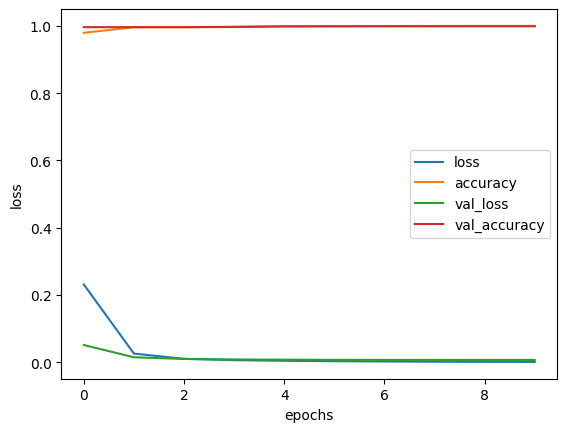

In [79]:
# Vizualizando a história do modelo

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [80]:
# Fazendo predições

preds = model.predict(x_test)
preds

94/94 [==============================] - 0s 2ms/step


array([[1.6824254e-04],
       [2.7913450e-06],
       [2.1126501e-05],
       ...,
       [8.0256810e-05],
       [1.1807008e-04],
       [1.0728980e-04]], dtype=float32)

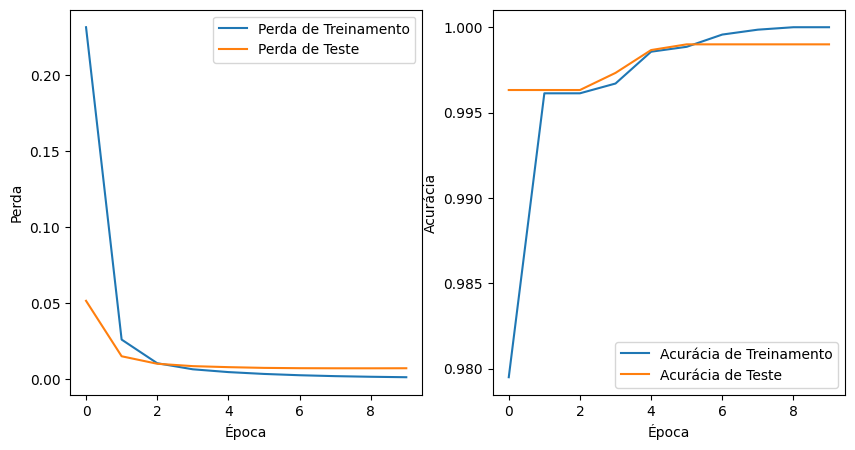

In [82]:
# Plotando o gráfico das funções de perda

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Teste')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Teste')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

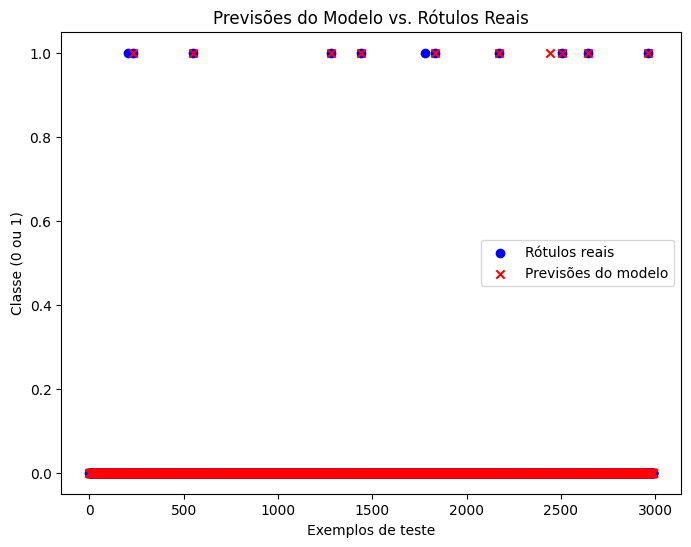

In [81]:
# PLotando um gráfico das previsões

threshold = 0.5
y_pred = (preds > threshold).astype(int)

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Rótulos reais', c='b', marker='o')
plt.scatter(range(len(y_test)), y_pred, label='Previsões do modelo', c='r', marker='x')
plt.xlabel('Exemplos de teste')
plt.ylabel('Classe (0 ou 1)')
plt.legend(loc='best')
plt.title('Previsões do Modelo vs. Rótulos Reais')
plt.show()